# ATAC-seq - Quantify accessibility of RNA derived promoter regions
- goal: promoter region quantification
- input: promoter regions & ATAC samples
- output: counts table of promoter regions by ATAC-seq samples & unsupervised analysis for QC

In [1]:
cd ../

/home/sreichl/projects/bmdm-stim


In [2]:
#libraries
import os
import pandas as pd
import pybedtools as bedtools

In [5]:
# import util functions
import sys
sys.path.insert(1, os.path.join('src'))

import utils_dimred_UMAP_PCA

In [4]:
# configs
dir_data = os.path.join('results','ATAC', 'all')

bam_path = 'results/ATAC/atacseq_results/{0}/mapped/{0}.filtered.bam'
chrom_file = os.path.join("resources/atacseq/mm10.chromSizes")

# TODO: set YOUR bedtools path here
bedtools.helpers.set_bedtools_path(path='/nobackup/lab_bock/users/sreichl/miniconda3/envs/atac_analysis/bin')

# load data

In [15]:
# load promoter regions
promoter_regions = bedtools.BedTool(os.path.join(dir_data, 'promoter_regions.bed'))
promoter_regions.head()

chr1	3071252	3073452	ENSMUSG00000102693	.	+
 chr1	3100015	3102215	ENSMUSG00000064842	.	+
 chr1	3671298	3673498	ENSMUSG00000051951	.	-
 chr1	3250756	3252956	ENSMUSG00000102851	.	+
 chr1	3368349	3370549	ENSMUSG00000103377	.	-
 chr1	3377588	3379788	ENSMUSG00000104017	.	-
 chr1	3467085	3469285	ENSMUSG00000103025	.	-
 chr1	3464586	3466786	ENSMUSG00000089699	.	+
 chr1	3514307	3516507	ENSMUSG00000103201	.	-
 chr1	3529794	3531994	ENSMUSG00000103147	.	+
 

In [5]:
# Load sample annotation
annot = pd.read_csv(os.path.join('metadata','ATAC_sample_metadata.csv'), index_col=0, header=0,)
print(annot.shape)
annot.head()

(78, 10)


,library,timepoint after thawing,cell_line,Treatment,Treatment_time,mouse_pool,sex,bio-replicate,organism,experiment_id
sample_name,,,,,,,,,,
PT76_R1_C_albicans_2h,ATAC-seq,d010,BMDM,C_albicans,2h,PT62_c,female,R1,mouse,PT76
PT76_R1_C_albicans_4h,ATAC-seq,d010,BMDM,C_albicans,4h,PT62_c,female,R1,mouse,PT76
PT76_R1_C_albicans_6h,ATAC-seq,d010,BMDM,C_albicans,6h,PT62_c,female,R1,mouse,PT76
PT76_R1_C_albicans_8h,ATAC-seq,d010,BMDM,C_albicans,8h,PT62_c,female,R1,mouse,PT76
PT76_R1_untreated_0h,ATAC-seq,d010,BMDM,untreated,0h,PT62_c,female,R1,mouse,PT76


In [27]:
annot['bam_paths'] = [bam_path.format(x) for x in annot.index]

In [38]:
sample_list = []

In [ ]:
for sample in annot.index:
    tmp_result = promoter_regions.coverage(b=annot.loc[sample,'bam_paths']).to_dataframe(
                names=["CHR", "START", "END", "ID", "scores", "strands", sample, "NA1", "NA2", "NA3"],
                dtype={sample: int},
                usecols=['ID', sample],
                index_col='ID')
    
    sample_list.append(tmp_result)

In [ ]:
result = pd.concat(sample_list, axis=1)

In [12]:
print(result.shape)
result.head()

(55487, 78)


,PT76_R1_C_albicans_2h,PT76_R1_C_albicans_4h,PT76_R1_C_albicans_6h,PT76_R1_C_albicans_8h,PT76_R1_untreated_0h,PT76_R1_IFN_beta_2h,PT76_R1_IFN_beta_4h,PT76_R1_IFN_beta_6h,PT76_R1_IFN_beta_8h,PT76_R1_IFN_gamma_2h,...,PT82_R2_IFN_gamma_24h,PT82_R2_IFN_gamma_8h,PT82_R2_LCMV_Cl13_24h,PT82_R2_LCMV_Cl13_8h,PT82_R2_LO28_24h,PT82_R2_LO28_8h,PT82_R2_LPS_24h,PT82_R2_LPS_8h,PT82_R2_untreated_24h,PT82_R2_untreated_8h
ID,,,,,,,,,,,,,,,,,,,,,
ENSMUSG00000102693,3,7,0,5,3,3,2,1,0,2,...,3,5,2,3,14,5,1,6,6,9
ENSMUSG00000064842,2,3,8,1,1,5,3,2,3,5,...,2,2,1,2,11,1,3,3,5,12
ENSMUSG00000051951,8,11,5,11,7,10,5,2,4,13,...,6,8,5,7,22,9,6,4,10,17
ENSMUSG00000102851,3,8,2,7,5,6,5,4,2,7,...,7,14,7,6,41,16,9,17,5,11
ENSMUSG00000103377,4,3,2,4,5,1,5,2,4,9,...,4,10,3,5,11,7,7,5,9,8


In [ ]:
# save results
result.to_csv(os.path.join(dir_data, "promoter_counts.csv"))

In [9]:
# load results
result = pd.read_csv(os.path.join(dir_data, "promoter_counts.csv"), index_col='ID')

discrete variable  Treatment_time


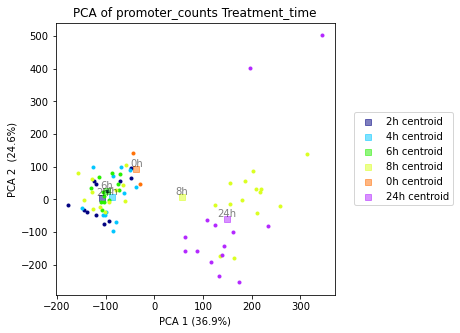

discrete variable  Treatment


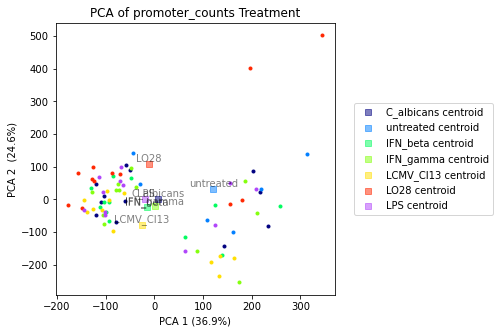

discrete variable  Treatment_time


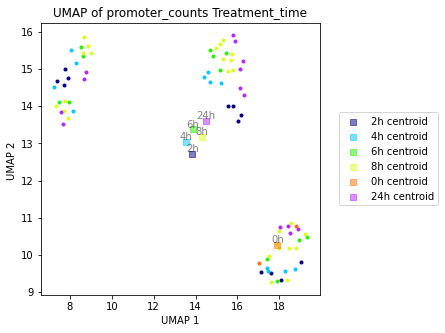

discrete variable  Treatment


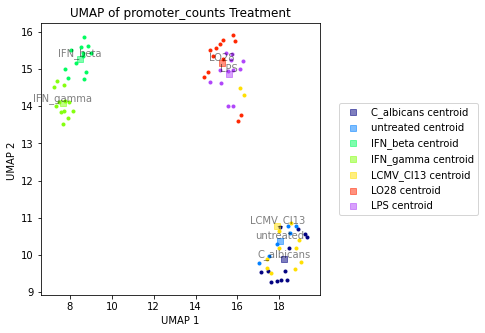

In [13]:
# unsupervised analysis plot PCA & UMAP
dimred_UMAP_PCA.dimred_plot(data=result.T, 
            annot=annot, 
            variables=['Treatment_time','Treatment'], 
           label='promoter_counts',
            results_dir=os.path.join(dir_data, "unsupervised_analysis"),
           )